<a href="https://colab.research.google.com/github/PomarGN/Proyecto_GCO/blob/main/Proyecto_GCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTACION DE LIBRERIAS**

In [1]:
#importación de librerías
import matplotlib as mpl         #gráficos
from matplotlib import style     #style package
import matplotlib.pyplot as plt  #gráficos
import seaborn as sns            #gráficos
import pandas as pd              #manipulacion de datos estructurados, tipo serie o frames ("tipo tabla")
import numpy as np               #manipulacion datos estructurados y tipo array ("matriz")

In [2]:
#para poder cambiar el estilo de los graficos
mpl.style.use('bmh')

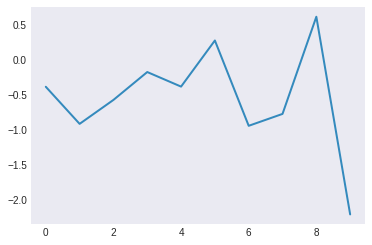

In [3]:
# se crean datos random para probar el estilo del gráfico
data = np.random.randn(10)
mpl.style.use('seaborn-dark')          #configura el estilo
plt.plot(data)              #crea la gráfica  
plt.show() 


In [4]:
#Importando los datos del archivo CSV
#from google.colab import files
#files.upload() 

# **IMPORTANDO DATA (BASE-SALDOS)**

In [ ]:
df_saldos = pd.read_csv('BaseSaldosF_Ene2023.csv',encoding='ISO-8859-1')
df_saldos['CodPer']= df_saldos['CodPer'].astype(str)
df_saldos['TipoCon']= df_saldos.TipoCon.replace({'Grande':'PRICO','Mediano':'MEPECO','Pequeño':'MEPECO'})
df_saldos = df_saldos[['CodPer','TipPer','TipoCon','NumDoc','DomFis','DisFis','Edad','PreDC01','PreDC02','PreDC03',
      'PreDC04','ArbDC01','ArbDC02','ArbDC03','ArbDC04','VehDC01','VehDC02','VehDC03','VehDC04','TotDeuGe','TotDeuSu',
      'TotDeuCn', 'TotDeuFi', 'EVA', 'EVALUACION','EXCLUS']]

#CONCATENANDO PARA CREAR LLAVE DE SEGUIMIENTO POR CONTRIB-TIPOTRIB-TIPOCUENTA
#df_saldos['IdCTP']= df_saldos['CodPer'] + df_saldos['c_codtri'] + df_saldos['TipCuen'] 
df_saldos.head(3)

<ipython-input-5-0328ce52d56c>:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_saldos = pd.read_csv('BaseSaldosF_Ene2023.csv',encoding='ISO-8859-1')


,CodPer,TipPer,TipoCon,NumDoc,DomFis,DisFis,Edad,PreDC01,PreDC02,PreDC03,...,VehDC02,VehDC03,VehDC04,TotDeuGe,TotDeuSu,TotDeuCn,TotDeuFi,EVA,EVALUACION,EXCLUS
0,190960,Persona Jurídica,PRICO,20100138523,CL. LOS ALAMOS N° 0281 -SAN ISIDRO,SAN ISIDRO,NaN,0,0,0,...,0.0,0.0,0.0,20143.1,0.00,0.00,20143.10,03. A_A,DEBE TODO DEL 5TO AÑO ANTERIOR HACIA ATRÁS (19...,NaN
1,864484,Persona Jurídica,PRICO,20508889161,Mz 55 Lt 11 - AAHH BUENOS MILAGROS PAMPLONA AL...,SAN JUAN DE MIRAFLORES,NaN,0,0,0,...,0.0,0.0,0.0,36666.7,0.00,2717.07,33949.63,03. A_A,DEBE SOLO CUOTA(S) DEL 5TO AÑO ANTERIOR HACIA...,NaN
2,151195,Persona Jurídica,PRICO,20269128144,CL. PALMA DE MALLORCA N° 0260 -SAN LUIS,SAN LUIS,NaN,0,0,0,...,0.0,0.0,0.0,24272.5,4336.16,25341.08,3267.58,03. A_A,DEBE SOLO CUOTA(S) DEL 5TO AÑO ANTERIOR HACIA...,NaN


In [ ]:
#df_saldos.columns.unique()

# **CONSOLIDANDO DATA (BASES-PAGOS MENSUALES)**

In [ ]:
#PagosMarzo
df_pagosMar = pd. read_csv('Reporte.csv',encoding='ISO-8859-1')
df_pagosMar['c_contri']= df_pagosMar['c_contri'].astype(str)
df_pagosMar['Total_Pago']= pd.to_numeric(df_pagosMar['Total_Pago'])

df_ConsolidadoPagos= df_pagosMar
df_ConsolidadoPagos['d_feccob']= pd.to_datetime(df_pagosMar['d_feccob'], dayfirst=True)
df_ConsolidadoPagos['MesRPago']= df_ConsolidadoPagos['d_feccob'].dt.strftime('%m')
df_ConsolidadoPagos['MesRPago']= pd.to_numeric(df_ConsolidadoPagos['MesRPago'])
df_pagosMar= df_ConsolidadoPagos[['MesRPago','Contri','c_contri','c_codtri','cDistrito','cAno','Periodo','Insoluto_M','Total_Pago']]
df_pagosMar

,MesRPago,Contri,c_contri,c_codtri,cDistrito,cAno,Periodo,Insoluto_M,Total_Pago
0,3,Pequeños,131,145,LIMA,2023,1,195.95,197.75
1,3,Pequeños,131,145,LIMA,2023,2,195.54,195.54
2,3,Pequeños,131,145,LIMA,2023,3,195.54,195.54
3,3,Pequeños,131,145,LIMA,2023,4,195.54,195.54
4,3,Pequeños,170,145,LIMA,2023,1,7.44,10.04
...,...,...,...,...,...,...,...,...,...
113166,3,Pequeños,621455,146,CHORRILLOS,2023,4,200.00,200.00
113167,3,Gran Contribuyente,650472,200,LIMA,2023,4,108.69,108.69
113168,3,Pequeños,651266,146,SAN JUAN DE LURIGANCHO,2023,1,218.93,222.73
113169,3,Pequeños,652002,146,LA MOLINA,2023,1,327.36,331.16


In [ ]:
#PagosFebrero
df_pagosFeb = pd. read_csv('ReporPagos_02-2023.csv',encoding='ISO-8859-1')
df_pagosFeb['c_contri']= df_pagosFeb['c_contri'].astype(str)
df_pagosFeb['Total_Pago']= pd.to_numeric(df_pagosFeb['Total_Pago'])

df_ConsolidadoPagos= df_pagosFeb
df_ConsolidadoPagos['d_feccob']= pd.to_datetime(df_pagosFeb['d_feccob'], dayfirst=True)
df_ConsolidadoPagos['MesRPago']= df_ConsolidadoPagos['d_feccob'].dt.strftime('%m')
df_ConsolidadoPagos['MesRPago']= pd.to_numeric(df_ConsolidadoPagos['MesRPago'])
df_pagosFeb= df_ConsolidadoPagos[['MesRPago','Contri','c_contri','c_codtri','cDistrito','cAno','Periodo','Insoluto_M','Total_Pago']]
df_pagosFeb
#df_pagosFeb.to_csv('PagosMar.csv',encoding='latin1')

<ipython-input-8-f057163686a9>:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pagosFeb = pd. read_csv('ReporPagos_02-2023.csv',encoding='ISO-8859-1')


,MesRPago,Contri,c_contri,c_codtri,cDistrito,cAno,Periodo,Insoluto_M,Total_Pago
0,2,Pequeños,1607022,145,LIMA,2023,1,134.58,137.18
1,2,Pequeños,1607022,200,LIMA,2023,1,62.88,64.08
2,2,Pequeños,1607045,145,LIMA,2023,1,33.85,37.25
3,2,Pequeños,1607045,145,LIMA,2023,2,33.85,33.85
4,2,Pequeños,1607045,145,LIMA,2023,3,33.85,33.85
...,...,...,...,...,...,...,...,...,...
596953,2,Pequeños,2635008,200,LIMA,2023,2,32.09,32.09
596954,2,Pequeños,2636247,145,LOS OLIVOS,2023,3,14.11,14.11
596955,2,Pequeños,2633975,145,LIMA,2023,1,126.90,129.50
596956,2,Pequeños,2633859,200,LIMA,2023,3,32.24,32.24


In [ ]:
#PagosEnero
df_pagosEne = pd. read_csv('ReporPagos_01-2023.csv',encoding='ISO-8859-1')
df_pagosEne['c_contri']= df_pagosEne['c_contri'].astype(str)
df_pagosEne['Total_Pago']= pd.to_numeric(df_pagosEne['Total_Pago'])

df_ConsolidadoPagos= df_pagosEne
df_ConsolidadoPagos['d_feccob']= pd.to_datetime(df_pagosEne['d_feccob'], dayfirst=True)
df_ConsolidadoPagos['MesRPago'] = df_ConsolidadoPagos['d_feccob'].dt.strftime('%m')
df_ConsolidadoPagos['MesRPago']= pd.to_numeric(df_ConsolidadoPagos['MesRPago'])
df_pagosEne= df_ConsolidadoPagos[['MesRPago','Contri','c_contri','c_codtri','cDistrito','cAno','Periodo','Insoluto_M','Total_Pago']]
df_pagosEne

<ipython-input-9-4b5de45cb7dd>:2: DtypeWarning: Columns (17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pagosEne = pd. read_csv('ReporPagos_01-2023.csv',encoding='ISO-8859-1')


,MesRPago,Contri,c_contri,c_codtri,cDistrito,cAno,Periodo,Insoluto_M,Total_Pago
0,1,Pequeños,1198719,145,LIMA,2023,3,7.43,7.43
1,1,Pequeños,1198719,145,LIMA,2023,4,7.43,7.43
2,1,Pequeños,1198719,200,LIMA,2019,4,6.60,6.60
3,1,Pequeños,1198719,200,LIMA,2020,2,7.02,7.02
4,1,Pequeños,1198719,200,LIMA,2020,3,7.02,7.02
...,...,...,...,...,...,...,...,...,...
224777,1,Pequeños,2450056,146,LINCE,2022,4,262.46,275.46
224778,1,Pequeños,2450308,146,CHORRILLOS,2022,3,99.00,160.00
224779,1,Pequeños,2450373,146,EL AGUSTINO,2023,1,277.14,280.94
224780,1,Pequeños,2450811,146,SAN JUAN DE MIRAFLORES,2022,4,140.87,153.87


In [ ]:
#CONSOLIDANDO PAGOS DE CADA MES
df_ConsolidadoPagos= pd.concat([df_pagosEne, df_pagosFeb,df_pagosMar], axis=0)

#CREANDO EL TIPO DE CUENTA (Cuenta Corriente o Años Anteriores)
df_ConsolidadoPagos['TipCuen']= df_ConsolidadoPagos['cAno']=='2023'
df_ConsolidadoPagos= df_ConsolidadoPagos.replace({True:'CC',False:'AA'})

#REEMPLAZANDO LOS DATOS DE UNA COLUMNA POR OTROS NUEVOS
df_ConsolidadoPagos['TipContrib']= df_ConsolidadoPagos.Contri.replace({'Gran Contribuyente':'PRICO','Medianos':'MEPECO','Pequeños':'MEPECO'})

df_ConsolidadoPagos= df_ConsolidadoPagos[['MesRPago','TipContrib','c_contri','c_codtri','cDistrito','cAno','Periodo','Insoluto_M','Total_Pago']]
df_ConsolidadoPagos= df_ConsolidadoPagos.rename(columns={'Insoluto_M':'Insol_Pagd'}) #CAMBIO NUEVO NOMBRE DE COLUMNA

#df_ConsolidadoPagos= df_ConsolidadoPagos[df_ConsolidadoPagos['c_contri']=='1001533']
df_ConsolidadoPagos#.sample(6) #678,046  #821,740
#df_ConsolidadoPagos.to_excel('ConsolidadPagos.xlsx',encoding='latin1')

,MesRPago,TipContrib,c_contri,c_codtri,cDistrito,cAno,Periodo,Insol_Pagd,Total_Pago
0,1,MEPECO,1198719,145,LIMA,2023,3,7.43,7.43
1,1,MEPECO,1198719,145,LIMA,2023,4,7.43,7.43
2,1,MEPECO,1198719,200,LIMA,2019,4,6.60,6.60
3,1,MEPECO,1198719,200,LIMA,2020,2,7.02,7.02
4,1,MEPECO,1198719,200,LIMA,2020,3,7.02,7.02
...,...,...,...,...,...,...,...,...,...
113166,3,MEPECO,621455,146,CHORRILLOS,2023,4,200.00,200.00
113167,3,PRICO,650472,200,LIMA,2023,4,108.69,108.69
113168,3,MEPECO,651266,146,SAN JUAN DE LURIGANCHO,2023,1,218.93,222.73
113169,3,MEPECO,652002,146,LA MOLINA,2023,1,327.36,331.16


# **SEGMENTANDO LOS PAGOS - SOLO POR CUENTA CORRIENTE Y CONCEPTOS TRIBUTARIOS**



***TOTAL PAGOS*** - CC, AA, PRI, MEP - ***TODOS LOS PERIODOS***

In [ ]:
df_RPagos = df_ConsolidadoPagos
#REALIZANDO UN POCO DE LIMPIEZA
e= pd.Series(df_RPagos['Insol_Pagd'])
pd.to_numeric(e)
df_RPagos['c_contri']= df_RPagos['c_contri'].astype(str)
df_RPagos['c_codtri']= df_RPagos['c_codtri'].astype(str)
df_RPagos['Periodo']= df_RPagos['Periodo'].astype(str)
df_RPagos['cAno']= df_RPagos['cAno'].astype(str)  #convirtiendo número a String(cadena)
df_RPagos = df_RPagos[~ df_RPagos.c_codtri.isin(['110','400','820'])]  #filtrado excluyendo otros codigos tributarios

#CREANDO EL TIPO DE CUENTA PAGADO (Cuenta Corriente o Años Anteriores)
df_RPagos['TipCuen']= df_RPagos['cAno']=='2023'
df_RPagos= df_RPagos[['MesRPago','TipCuen','c_contri','c_codtri','TipContrib','cDistrito','cAno','Periodo','Insol_Pagd','Total_Pago']]
df_RPagos= df_RPagos.replace({True:'CC',False:'AA'})
df_RPagos

<ipython-input-11-5e65f6757ff0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RPagos['TipCuen']= df_RPagos['cAno']=='2023'


,MesRPago,TipCuen,c_contri,c_codtri,TipContrib,cDistrito,cAno,Periodo,Insol_Pagd,Total_Pago
0,1,CC,1198719,145,MEPECO,LIMA,2023,3,7.43,7.43
1,1,CC,1198719,145,MEPECO,LIMA,2023,4,7.43,7.43
2,1,AA,1198719,200,MEPECO,LIMA,2019,4,6.60,6.60
3,1,AA,1198719,200,MEPECO,LIMA,2020,2,7.02,7.02
4,1,AA,1198719,200,MEPECO,LIMA,2020,3,7.02,7.02
...,...,...,...,...,...,...,...,...,...,...
113166,3,CC,621455,146,MEPECO,CHORRILLOS,2023,4,200.00,200.00
113167,3,CC,650472,200,PRICO,LIMA,2023,4,108.69,108.69
113168,3,CC,651266,146,MEPECO,SAN JUAN DE LURIGANCHO,2023,1,218.93,222.73
113169,3,CC,652002,146,MEPECO,LA MOLINA,2023,1,327.36,331.16


***TOTAL PAGOS*** - CC, PRI, MEP - ***SOLO 1 CUOTA***

In [ ]:
df2_RPagos= df_RPagos
i=1
for i in range(1,5):
  i=str(i)
  #CONCATENANDO PARA CREAR LLAVE DE SEGUIMIENTO
  df2_RPagos['IdCTP']= df2_RPagos['c_contri'] + df2_RPagos['c_codtri'] + df2_RPagos['TipCuen'] + df2_RPagos['Periodo']

  #FILTRANDO POR SOLO CUENTA CORRIENTE Y CUOTA 1
  df_PagosXC = df2_RPagos[(df2_RPagos.TipCuen.isin(['CC'])) & (df2_RPagos.Periodo.isin([i]))]

  #REDUCIENDO VARIABLES - SOLO LAS DETERMINANTES 
  df_PagosXC= df_PagosXC[['c_contri','TipCuen','c_codtri','Periodo','IdCTP','Insol_Pagd']]
  df_PagosXC= df_PagosXC.sort_values(['TipCuen','c_codtri'],ascending=False)  #Ordenando los datos por varias columnas
  df_RPagosXCuot= df_PagosXC.groupby(['TipCuen','c_contri','c_codtri','Periodo','IdCTP']).aggregate('sum') #Sumatoria por grupos
  df_RPagosXCuot= df_RPagosXCuot.reset_index()
  #df_RPagosXCuot= df_RPagosXCuot[['IdCTP','Insol_Pagd']]
  tit= 'RPagos_XCuota'+ i + '.csv'
  df_RPagosXCuot.to_csv(tit,encoding='latin1', index= False)

# ***MASIVA VS PAGOS SOLO UNA CUOTA***

In [ ]:
df_PagoCuota1 = pd.read_csv('RPagos_XCuota1.csv',encoding='ISO-8859-1')
df_PagoCuota2 = pd.read_csv('RPagos_XCuota2.csv',encoding='ISO-8859-1')
df_PagoCuota3 = pd.read_csv('RPagos_XCuota3.csv',encoding='ISO-8859-1')
df_PagoCuota4 = pd.read_csv('RPagos_XCuota4.csv',encoding='ISO-8859-1')
dicLlamadaPagos={'1':df_PagoCuota1,'2':df_PagoCuota2,'3':df_PagoCuota3, '4':df_PagoCuota4}

df_Masiva = pd.read_csv('MASIVA2023.csv',encoding='ISO-8859-1')
df_Masiva['Total Emitido'] = pd.to_numeric(df_Masiva['Total Emitido']) #Conversion a números
df_Masiva['Tipo Contrib 2022'] = df_Masiva['Tipo Contrib 2022'].str.upper() #Conversion a mayúsculas

print("\n💼CARTERA MASIVA POR TIPO DE TRIBUTO Y POR CUOTA💼")
lPer=['1','2','3','4']

while(True):
    cuota=input(("\nINGRESAR CUOTA QUE SERVIRA PARA EVALUAR:"
                  "\n\t\t\t[1] Cuota1 \n\t\t\t[2] Cuota2"
                  "\n\t\t\t[3] Cuota3 \n\t\t\t[4] Cuota4 ::: "))
    if cuota in lPer:
        df_Masiva['Codigo Persona']= df_Masiva['Codigo Persona'].astype(str)
        df_Masiva= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','Edad','Sexo','Emitido_IP','Emitido_ARB','Emitido_IPV']]
        df_Masiva['Emitido_IP']= round(df_Masiva.Emitido_IP/4,2)
        df_Masiva['Emitido_ARB']= round(df_Masiva.Emitido_ARB/4,2)
        df_Masiva['Emitido_IPV']= round(df_Masiva.Emitido_IPV/4,2)
        df_Masiva= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','Edad','Sexo','Emitido_IP','Emitido_ARB','Emitido_IPV']]
    
        df_Predial= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','Edad','Sexo','Emitido_IP']]
        df_Predial.rename({'Emitido_IP':'InsDeuC'}, axis=1, inplace=True)
        df_Predial['c_codtri']= 145
        df_Predial['IdCTP']= df_Masiva['Codigo Persona'] + '145CC' + cuota  #Concatenando para crear Llave
        df_Predial= df_Predial[df_Predial['InsDeuC']>0]
        df_Predial= df_Predial[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','Edad','Sexo','c_codtri','IdCTP','InsDeuC']]

        df_Arbitrio= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','Edad','Sexo','Emitido_ARB']]
        df_Arbitrio.rename({'Emitido_ARB':'InsDeuC'}, axis=1, inplace=True)
        df_Arbitrio['c_codtri']= 200
        df_Arbitrio['IdCTP']= df_Masiva['Codigo Persona'] + '200CC' + cuota  #Concatenando para crear Llave
        df_Arbitrio= df_Arbitrio[df_Arbitrio['InsDeuC']>0]
        df_Arbitrio= df_Arbitrio[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','Edad','Sexo','c_codtri','IdCTP','InsDeuC']]

        df_Vehicular= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','Edad','Sexo','Emitido_IPV']]
        df_Vehicular.rename({'Emitido_IPV':'InsDeuC'}, axis=1, inplace=True)
        df_Vehicular['c_codtri']= 146
        df_Vehicular['IdCTP']= df_Masiva['Codigo Persona'] + '146CC' + cuota  #Concatenando para crear Llave
        df_Vehicular= df_Vehicular[df_Vehicular['InsDeuC']>0]
        df_Vehicular= df_Vehicular[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','Edad','Sexo','c_codtri','IdCTP','InsDeuC']]

        break           
    else: print("**NRO DE CUOTA NO VÁLIDA**⚠❌") 

df_ListaC1= pd.concat([df_Predial, df_Arbitrio, df_Vehicular], axis=0)
df2_ListaC1= pd.merge(df_ListaC1, df_saldos[['CodPer','TipoCon','EVA']], left_on='Codigo Persona', right_on='CodPer', how='left')
df3_ListaC1= pd.merge(df2_ListaC1, dicLlamadaPagos[cuota][['IdCTP','Insol_Pagd']], how='left') #,'TipContrib'
#EVALUANDO SI EL PAGO ES MAYOR A CERO (Se determina si pagó o no)
df3_ListaC1['Pagó?']= df3_ListaC1['Insol_Pagd']>0
df3_ListaC1= df3_ListaC1.replace({True:'Si',False:'No'})
#RESULTADO DE EFECTIVIDAD O AVANCE DEL PAGO VS LA DEUDA
df3_ListaC1['%']= round((df3_ListaC1['Insol_Pagd']/df3_ListaC1['InsDeuC']),1)
df3_ListaC1
titulo= 'SeguimXCuotaUnica'+ cuota + '.csv'
df3_ListaC1.to_csv(titulo,encoding='latin1')

<ipython-input-121-2d43f7377977>:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Masiva = pd.read_csv('MASIVA2023.csv',encoding='ISO-8859-1')



💼CARTERA MASIVA POR TIPO DE TRIBUTO Y POR CUOTA💼

INGRESAR CUOTA QUE SERVIRA PARA EVALUAR:
			[1] Cuota1 
			[2] Cuota2
			[3] Cuota3 
			[4] Cuota4 ::: 4


<ipython-input-121-2d43f7377977>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Masiva['Emitido_IP']= round(df_Masiva.Emitido_IP/4,2)
<ipython-input-121-2d43f7377977>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Masiva['Emitido_ARB']= round(df_Masiva.Emitido_ARB/4,2)
<ipython-input-121-2d43f7377977>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
 df3_ListaC1

,Codigo Persona,Tipo Contrib 2022,Distrito fiscal,Edad,Sexo,c_codtri,IdCTP,InsDeuC,CodPer,TipoCon,EVA,Insol_Pagd,Pagó?,%
0,21929,PRICO,LIMA,NaN,NaN,145,21929145CC1,641.46,21929,PRICO,01. 2023,NaN,No,NaN
1,8720,PRICO,SAN ISIDRO,NaN,NaN,145,8720145CC1,2397.26,8720,PRICO,02. 2023-AA,NaN,No,NaN
2,187199,PRICO,LIMA,NaN,NaN,145,187199145CC1,23839.34,187199,PRICO,01. 2023,23839.34,Si,1.0
3,90313,MEPECO,LIMA,NaN,NaN,145,90313145CC1,23.23,90313,MEPECO,01. 2023,NaN,No,NaN
4,804399,PRICO,SAN ISIDRO,NaN,NaN,145,804399145CC1,9110.55,804399,PRICO,01. 2023,9118.75,Si,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357115,216540,PRICO,MIRAFLORES,NaN,NaN,146,216540146CC1,43770.66,216540,PRICO,02. 2023-AA,36837.04,Si,0.8
357116,81371,PRICO,SAN ISIDRO,NaN,NaN,146,81371146CC1,4448.62,81371,PRICO,02. 2023-AA,9374.08,Si,2.1
357117,8750,PRICO,SAN ISIDRO,NaN,NaN,146,8750146CC1,2055931.66,8750,PRICO,02. 2023-AA,2023809.65,Si,1.0
357118,8715,PRICO,LA MOLINA,NaN,NaN,146,8715146CC1,2436421.49,8715,PRICO,01. 2023,2522039.64,Si,1.0


# ***MASIVA VS PAGOS TOTAL CUOTAS***

In [ ]:
df_Masiva = pd.read_csv('MASIVA2023.csv',encoding='ISO-8859-1')
df_Masiva['Total Emitido'] = pd.to_numeric(df_Masiva['Total Emitido']) #Conversion a números
df_Masiva['Tipo Contrib 2022'] = df_Masiva['Tipo Contrib 2022'].str.upper() #Conversion a mayúsculas
df_Masiva= pd.merge(df_Masiva, df_ZonasLM, how='left')

df_Masiva['Codigo Persona']= df_Masiva['Codigo Persona'].astype(str)
df_Masiva= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','ZonasLM','Edad','Sexo','Emitido_IP','Emitido_ARB','Emitido_IPV']]

df_Predial= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','ZonasLM','Edad','Sexo','Emitido_IP']]
df_Predial.rename({'Emitido_IP':'InsTotCC'}, axis=1, inplace=True)
df_Predial['c_codtri']= '145'
df_Predial['IdCTP']= df_Masiva['Codigo Persona'] + '145CC' #Concatenando para crear Llave
df_Predial= df_Predial[df_Predial['InsTotCC']>0]
df_Predial= df_Predial[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','ZonasLM','Edad','Sexo','c_codtri','IdCTP','InsTotCC']]

df_Arbitrio= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','ZonasLM','Edad','Sexo','Emitido_ARB']]
df_Arbitrio.rename({'Emitido_ARB':'InsTotCC'}, axis=1, inplace=True)
df_Arbitrio['c_codtri']= '200'
df_Arbitrio['IdCTP']= df_Masiva['Codigo Persona'] + '200CC' #Concatenando para crear Llave
df_Arbitrio= df_Arbitrio[df_Arbitrio['InsTotCC']>0]
df_Arbitrio= df_Arbitrio[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','ZonasLM','Edad','Sexo','c_codtri','IdCTP','InsTotCC']]

df_Vehicular= df_Masiva[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','ZonasLM','Edad','Sexo','Emitido_IPV']]
df_Vehicular.rename({'Emitido_IPV':'InsTotCC'}, axis=1, inplace=True)
df_Vehicular['c_codtri']= '146'
df_Vehicular['IdCTP']= df_Masiva['Codigo Persona'] + '146CC' #Concatenando para crear Llave
df_Vehicular= df_Vehicular[df_Vehicular['InsTotCC']>0]
df_Vehicular= df_Vehicular[['Codigo Persona','Tipo Contrib 2022','Distrito fiscal','ZonasLM','Edad','Sexo','c_codtri','IdCTP','InsTotCC']]

df_TotCuotxCCC= pd.concat([df_Predial, df_Arbitrio, df_Vehicular], axis=0)
df_TotCuotxCCC= df_TotCuotxCCC.rename(columns={'Codigo Persona':'CodPer'})
df2_TotCuotxCCC= pd.merge(df_TotCuotxCCC, df_saldos[['CodPer','TipoCon','DisFis','EVA']], how='left')
df3_TotCuotxCCC= pd.merge(df2_TotCuotxCCC, df_RPagosTotC[['IdCTP','Insol_Pagd']], how='left')
#EVALUANDO SI EL PAGO ES MAYOR A CERO (Se determina si pagó o no)
df3_TotCuotxCCC['Pagó?']= df3_TotCuotxCCC['Insol_Pagd']>0
df3_TotCuotxCCC= df3_TotCuotxCCC.replace({True:'Si',False:'No'})
#RESULTADO DE EFECTIVIDAD O AVANCE DEL PAGO VS LA DEUDA
df3_TotCuotxCCC['%']= round((df3_TotCuotxCCC['Insol_Pagd']/df3_TotCuotxCCC['InsTotCC'])*100,1)
#df3_TotCuotxCCC= df3_TotCuotxCCC[df3_TotCuotxCCC['CodPer']=='1557446']
df3_TotCuotxCCC
df3_TotCuotxCCC.to_excel('SeguimXTotCuotas.xlsx',encoding='latin1')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-29-0093030ec57f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Predial['c_codtri']= '145'
<ipython-input-29-0093030ec57f>:18: SettingWithCopyWarning: 
A value is trying to be set on a

In [ ]:
df_Masiva= df_Masiva[df_Masiva['Codigo Persona']=='1557446']
df_Masiva

,Codigo Persona,Tipo Contrib 2022,Distrito fiscal,ZonasLM,Edad,Sexo,Emitido_IP1,Emitido_ARB1,Emitido_IPV1
161295,1557446,MEPECO,LIMA,CENTRO,61.0,F,9.0,14.88,0.0


# **ACTUALIZAR TIPO_CONTRIBUYENTE (SEGUN BASE PAGOS)**

In [ ]:
#ELIMINANDO REGISTROS DUPLICADOS
df_TipContri01 = df_pagosEne[['c_contri','Contri','MesRPago']].drop_duplicates()
df_TipContri02 = df_pagosFeb[['c_contri','Contri','MesRPago']].drop_duplicates()

#df_TipContri02 = df_TipContri02.rename(columns={'Contri':'Contri2'})
df_TotTipContriXPg = pd.merge(df_TipContri01, df_TipContri02, how='outer')
df_TotTipContriXPg['Contri']= df_TotTipContriXPg.Contri.replace({'Gran Contribuyente':'PRICO','Medianos':'MEPECO','Pequeños':'MEPECO'})
df_TotTipContriXPg = df_TotTipContriXPg[['c_contri','Contri']].drop_duplicates()
df_TotTipContriXPg
#df_TotTipContriXPg.to_csv('TotTipContriXPg.csv',encoding='latin1')

,c_contri,Contri
0,1198719,MEPECO
1,1198787,PRICO
2,170,MEPECO
3,195,MEPECO
4,215,MEPECO
...,...,...
159750,2636292,MEPECO
159751,2636296,MEPECO
159752,2634518,MEPECO
159753,2634699,PRICO


# **AVANCE DE CADA CUOTA EN BASE A PAGOS EFECTUADOS**

PAGOS DE CADA CUOTA

In [ ]:
df2_RPagos= df_RPagos

#CONCATENANDO PARA CREAR LLAVE DE SEGUIMIENTO
df2_RPagos['IdCTP']= df2_RPagos['c_contri'] + df2_RPagos['c_codtri'] + df2_RPagos['TipCuen'] + df2_RPagos['Periodo']

#FILTRANDO POR SOLO CUENTA CORRIENTE Y CUOTA 1
df2_RPagosC1 = df2_RPagos[(df2_RPagos.TipCuen.isin(['CC'])) & (df2_RPagos.Periodo.isin(['1']))]
df2_RPagosC2 = df2_RPagos[(df2_RPagos.TipCuen.isin(['CC'])) & (df2_RPagos.Periodo.isin(['2']))]
df2_RPagosC3 = df2_RPagos[(df2_RPagos.TipCuen.isin(['CC'])) & (df2_RPagos.Periodo.isin(['3']))]
df2_RPagosC4 = df2_RPagos[(df2_RPagos.TipCuen.isin(['CC'])) & (df2_RPagos.Periodo.isin(['4']))]

#REDUCIENDO VARIABLES - SOLO LAS DETERMINANTES 

df2_RPagosC1= df2_RPagosC1[['c_contri','TipCuen','c_codtri','Periodo','IdCTP','Insol_Pagd']]
df2_RPagosC2= df2_RPagosC2[['c_contri','TipCuen','c_codtri','Periodo','IdCTP','Insol_Pagd']]
df2_RPagosC3= df2_RPagosC3[['c_contri','TipCuen','c_codtri','Periodo','IdCTP','Insol_Pagd']]
df2_RPagosC4= df2_RPagosC4[['c_contri','TipCuen','c_codtri','Periodo','IdCTP','Insol_Pagd']]
df2_RPagosXCuot= pd.concat([df2_RPagosC1, df2_RPagosC2, df2_RPagosC3, df2_RPagosC4], axis=0)
df2_RPagosXCuot= df2_RPagosXCuot.sort_values(['TipCuen','c_codtri'],ascending=False)  #Ordenando los datos por varias columnas
df_RPagosXCuot= df2_RPagosXCuot.groupby(['TipCuen','c_contri','c_codtri','Periodo','IdCTP']).aggregate('sum') #Sumatoria por grupos
df_RPagosXCuot= df_RPagosXCuot.reset_index()
#df_RPagosXCuot= df_RPagosXCuot[df_RPagosXCuot['c_contri']=='253331']
df_RPagosXCuot
#df2_RPagosC1
#df_RPagosXCuot.to_csv('RPagos_XCuota.csv',encoding='latin1')

,TipCuen,c_contri,c_codtri,Periodo,IdCTP,Insol_Pagd
0,CC,1000005,146,1,1000005146CC1,139.47
1,CC,1000005,146,2,1000005146CC2,139.47
2,CC,1000005,146,3,1000005146CC3,139.47
3,CC,1000005,146,4,1000005146CC4,139.47
4,CC,1000016,146,1,1000016146CC1,189.90
...,...,...,...,...,...,...
492647,CC,999985,146,1,999985146CC1,120.50
492648,CC,99999,146,1,99999146CC1,482.18
492649,CC,99999,146,2,99999146CC2,482.18
492650,CC,99999,146,3,99999146CC3,482.18


RESUMEN DE BASE MASIVA Y PAGOS - CUOTA POR CUOTA

In [ ]:
df_Cuota1 = pd.read_csv('SeguimXCuotaUnica1.csv',encoding='ISO-8859-1')
df_Cuota2 = pd.read_csv('SeguimXCuotaUnica2.csv',encoding='ISO-8859-1')
df_Cuota3 = pd.read_csv('SeguimXCuotaUnica3.csv',encoding='ISO-8859-1')
df_Cuota4 = pd.read_csv('SeguimXCuotaUnica4.csv',encoding='ISO-8859-1')

df_UnionCuotas= pd.concat([df_Cuota1, df_Cuota2, df_Cuota3, df_Cuota4], axis=0)
df_UnionCuotas= df_UnionCuotas[['Tipo Contrib 2022','c_codtri','InsDeuC','Insol_Pagd','Pagó?']]
df_Resultado= df_UnionCuotas.groupby(['Pagó?','Tipo Contrib 2022','c_codtri']).aggregate('sum')
df_Resultado
#df_Resultado.to_csv('Resumen1_Cuotas.csv',encoding='latin1')

In [ ]:
df_UnionCuotas

,Tipo Contrib 2022,c_codtri,DeuXCuota_Ins,Insol_Pagd,Pagó?
0,PRICO,145,641.46,NaN,No
1,PRICO,145,2397.26,NaN,No
2,PRICO,145,23839.34,23839.34,Si
3,MEPECO,145,23.23,NaN,No
4,PRICO,145,9110.55,9118.75,Si
...,...,...,...,...,...
284497,PRICO,146,36543.36,NaN,No
284498,PRICO,146,18347.54,NaN,No
284499,PRICO,146,70211.51,NaN,No
284500,PRICO,146,24277.28,NaN,No


# **CRUCE DATA (NO NOTIF_PV_2023 VS PAGOS CC)**


In [ ]:
df_NoNotif= pd.read_csv('RsulNoNotif_2023.csv',encoding='ISO-8859-1')
df_NoNotif['c_contri']= df_NoNotif['c_contri'].astype(str)
df_NoNotif['T_Trib']= df_NoNotif['T_Trib'].astype(str)
#CONCATENANDO PARA CREAR LLAVE DE SEGUIMIENTO POR CONTRIB-TIPOTRIB-TIPOCUENTA
df_NoNotif['IdCTP']= df_NoNotif['c_contri'] + df_NoNotif['T_Trib'] + 'CC' 

#UNIENDO (JOIN) DATAFRAMES (DataNoNotificados y DataPagos)
df_ResulNoNotif_2023= pd.merge(df_NoNotif, df_TotCuotxCCC[['IdCTP','InsTotCC']], how='left')
df_ResulNoNotif_2023= pd.merge(df_ResulNoNotif_2023, df_RPagosTotC[['IdCTP','Insol_Pagd']], how='left')
#EVALUANDO SI EL PAGO ES MAYOR A CERO (Se determina si pagó o no)
df_ResulNoNotif_2023['Pago']= df_ResulNoNotif_2023['Insol_Pagd']>0
df_ResulNoNotif_2023= df_ResulNoNotif_2023.replace({True:'Si',False:'No'})
#RESULTADO DE EFECTIVIDAD O AVANCE DEL PAGO VS LA DEUDA
df_ResulNoNotif_2023['%']= round((df_ResulNoNotif_2023['Insol_Pagd']/df_ResulNoNotif_2023['DeuIns'])*100,1)
df_ResulNoNotif_2023
#df_ResulNoNotif_2023.to_excel('ResultadoNoNotif_PV_2023.xlsx',encoding='latin1')

,c_contri,Estado_Notif,Motivo_Notif,T_Trib,DeuIns,IdCTP,InsTotCC,Insol_Pagd,Pago,%
0,1027207,No Notificado,Dirección no existe,145,6071.08,1027207145CC,6071.08,6071.08,Si,100.0
1,875859,No Notificado,Dirección no existe,145,3347.60,875859145CC,3347.60,NaN,No,NaN
2,858374,No Notificado,Dirección no existe,145,910.04,858374145CC,910.04,910.04,Si,100.0
3,1614854,No Notificado,Dirección no existe,145,7376.20,1614854145CC,7376.20,NaN,No,NaN
4,2003500,No Notificado,Dirección no existe,145,116.80,2003500145CC,116.80,116.80,Si,100.0
...,...,...,...,...,...,...,...,...,...,...
6966,2719429,No Notificado,Dirección no existe,146,519.76,2719429146CC,519.76,129.94,Si,25.0
6967,2718601,No Notificado,Dirección no existe,146,673.72,2718601146CC,673.72,168.43,Si,25.0
6968,1064298,No Notificado,Dirección no existe,146,1014.56,1064298146CC,1014.56,253.64,Si,25.0
6969,2196559,No Notificado,Dirección no existe,146,851.48,2196559146CC,851.48,212.87,Si,25.0


# **SEGMENTACIONES**

**Resumen Toda la Base_Saldo**

In [ ]:
df2_saldos= df2_saldos[['TipoCon','EVA1','PreTOT','ArbTOT','VehTOT','MTrTOT','FraTOT','PFrTOT','Cant','TotalDeu']]
SegTB= df2_saldos.groupby(['TipoCon','EVA1']).aggregate('sum')
SegTB.sort_values(by=['TotalDeu'], ascending=True)
SegTB

PreTOT      ArbTOT      VehTOT     MTrTOT    FraTOT  \
TipoCon EVA1                                                                  
Grande  1) 2023      40171.814   38033.961   45122.304      0.000     3.769   
        2) 2023- 22   7997.191   10359.451   19764.355    539.136    45.516   
        3) 2023- AA  91314.233  131857.310   24947.137   2442.154    96.592   
        4) SOLO- AA  47331.346   19689.651   20574.547   3939.050   999.610   
        5) OTROS         0.000       0.000       0.000      0.000     0.000   
Mediano 1) 2023          2.238       5.720      15.899      0.000     0.000   
        2) 2023- 22      0.070       1.637       1.374      0.000     0.000   
        3) 2023- AA     23.272      89.299       2.247      5.500     0.000   
        4) SOLO- AA    140.967      66.992     753.250    126.471     3.681   
        5) OTROS         0.000       0.000       0.000      0.000     0.000   
Pequeño 1) 2023       8446.027   16150.485  101830.654      0.000   262.957   
        2) 2023- 22   2857.446    5436.020   22165.111   1670.474   588.477   
        3) 2023- AA  26755.255   54435.433    6635.748   5407.240   148.226   
        4) SOLO- AA   7669.881    8236.292   75861.039  20630.975  2043.027   
        5) OTROS         0.000       0.000       0.000      0.000     0.000   

                       PFrTOT    Cant    TotalDeu  
TipoCon EVA1                                       
Grande  1) 2023        55.653    9689  129756.544  
        2) 2023- 22   277.567    2480   47231.772  
        3) 2023- AA   566.792    2443  253873.700  
        4) SOLO- AA  1815.177    1262  109206.307  
        5) OTROS     5050.191     156    9743.196  
Mediano 1) 2023         0.000      22      23.857  
        2) 2023- 22     0.000       3       3.081  
        3) 2023- AA     0.000      16     121.542  
        4) SOLO- AA    50.328     256    1164.820  
        5) OTROS      123.090      16     261.062  
Pequeño 1) 2023        29.852  174665  128362.307  
        2) 2023- 22    17.083   36171   33113.627  
        3) 2023- AA    18.288   32231   94048.447  
        4) SOLO- AA   704.602   73373  118364.987  
        5) OTROS     3970.378    4984   79097.430

In [ ]:
SegTB.to_csv('Segmentacion_Tot_Base.csv',encoding='latin1')

**Resumen los que Pagaron**

In [ ]:
df_cruceData['Total_Pago']= round(df_cruceData['Total_Pago']/1000,3)
SegPagaron= df_cruceData.groupby(['TipoCon','EVA1']).aggregate('sum')
SegPagaron.sort_values(by=['TotalDeu'], ascending=True)
SegPagaron.to_csv('Segmentacion_Base_Pagaron.csv',encoding='latin1')

**Resumen los Pendientes de Pago**

In [ ]:
df_pendientes= df_pendientes[['TipoCon','EVA1','PreTOT','ArbTOT','VehTOT','MTrTOT','FraTOT','PFrTOT','Cant','TotalDeu']]
SegSP= df_pendientes.groupby(['TipoCon','EVA1']).aggregate('sum')
SegSP.sort_values(by=['TotalDeu'], ascending=True)
SegSP

PreTOT      ArbTOT     VehTOT     MTrTOT    FraTOT  \
TipoCon EVA1                                                                 
Grande  1) 2023      38736.360   36454.125  33457.343      0.000     3.769   
        2) 2023- 22   7693.144    8986.257  12678.081    473.016    31.984   
        3) 2023- AA  86841.355  120810.755   8782.431   2400.653    95.688   
        4) SOLO- AA  47319.283   19673.283  20551.841   3938.721   999.610   
        5) OTROS         0.000       0.000      0.000      0.000     0.000   
Mediano 1) 2023          2.201       5.625     15.899      0.000     0.000   
        2) 2023- 22      0.070       1.637      1.374      0.000     0.000   
        3) 2023- AA     23.272      89.299      2.247      5.500     0.000   
        4) SOLO- AA    140.967      66.992    753.250    126.471     3.681   
        5) OTROS         0.000       0.000      0.000      0.000     0.000   
Pequeño 1) 2023       8115.632   15547.237  98091.916      0.000   238.889   
        2) 2023- 22   2754.957    5260.740  21359.706   1622.342   560.914   
        3) 2023- AA  26536.332   54025.568   6543.195   5345.815   145.279   
        4) SOLO- AA   7665.953    8231.469  75744.384  20615.660  2043.027   
        5) OTROS         0.000       0.000      0.000      0.000     0.000   

                       PFrTOT      Cant    TotalDeu  
TipoCon EVA1                                         
Grande  1) 2023        55.653    9332.0  115075.102  
        2) 2023- 22   277.567    2349.0   31085.694  
        3) 2023- AA   566.792    2386.0  221696.848  
        4) SOLO- AA  1815.177    1259.0  109154.840  
        5) OTROS     5050.191     156.0    9743.196  
Mediano 1) 2023         0.000      21.0      23.725  
        2) 2023- 22     0.000       3.0       3.081  
        3) 2023- AA     0.000      16.0     121.542  
        4) SOLO- AA    50.328     256.0    1164.820  
        5) OTROS      123.090      16.0     261.062  
Pequeño 1) 2023        29.852  168541.0  123660.566  
        2) 2023- 22    17.083   34839.0   31950.312  
        3) 2023- AA    18.288   31850.0   93258.127  
        4) SOLO- AA   704.602   73250.0  118224.268  
        5) OTROS     3970.378    4984.0   79097.430

In [ ]:
SegSP.to_csv('Segmentacion_Solo_Pend.csv',encoding='latin1')

# **GRAFICAS**

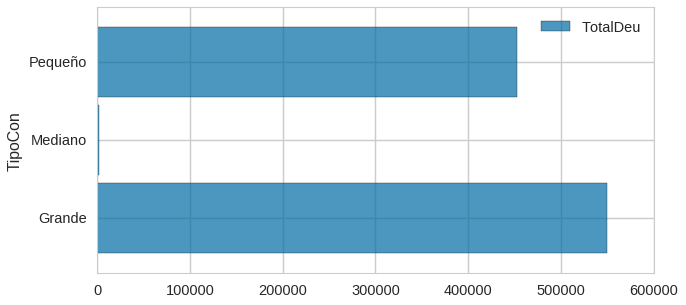

In [ ]:
colores = ['#FFD700','#CB4335','#8C7853']
SegCont.plot(kind = 'barh', 
             #stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.7,               # nivel de transparencia
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(8,4))             # Cambiamos el tamaño de la figura